<a href="https://colab.research.google.com/github/NathanMacktravis/Training_SG/blob/main/Loan_approval_prediction_(Best).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

# 1) Collecting data and describing columns

In [2]:
df = pd.read_csv('/content/loan_approval_dataset.csv')

In [3]:
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

The **loan approval dataset** is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

* **loan_id** :	ID of the loan
* **no_of_dependents** :Number of Dependents of the Applicant  
* **education** : Education of the Applicant
* **self_employed**	: Employment Status of the Applicant (self employed or not)
* **income_annum** :	Annual Income of the Applicant
* **loan_amount** :	Loan amount
* **loan_term** : 	Loan Term in Years
* **cibil_score** :	credit score
* **residential_assets_value** :	value of the residential assets
* **commercial_assets_value**	: value of the commercial assets
* **luxury_assets_value** :	Value of the luxurial assets
* **bank_asset_value**	: value of the bank assets
* **loan_status** : Loan approval status (approved or rejected)

# 2) Exploratory Data Analysis

# Objectif :
* Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
* Développer une premiere stratégie de modélisation

# Checklist de base
### Analyse de Forme :
* variable target : loan_status
* lignes et colonnes : 4269, 13
* types de variables : **qualitatives** : 3, **quantitatives** : 10
* Analyse des valeurs manquantes :
Aucune valeur manquante

### Analyse de Fond :
* Statistiques descriptives : OK
* Visualisation de la target : **Approved** : 2656, **Rejected** : 1613 => **Classes déséquilibrées**.

* Signification des variables :
OK
* Visualisation des variables quantitatives : OK
* Visualisation des variables qualitatives : OK
* Visualisation des outliers : OK
* Visualisation des corrélations : OK
* Visualisations Target-Variables : OK



### Tests d'hypothèses statistiques
**(Pas nécessaire)**





## a) Column analysis

In [4]:
# Dimension
df.shape

(4269, 13)

In [5]:
# Analyzing type of columns
df.dtypes.value_counts()

int64     10
object     3
Name: count, dtype: int64

In [6]:
# General infos about features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


<Axes: >

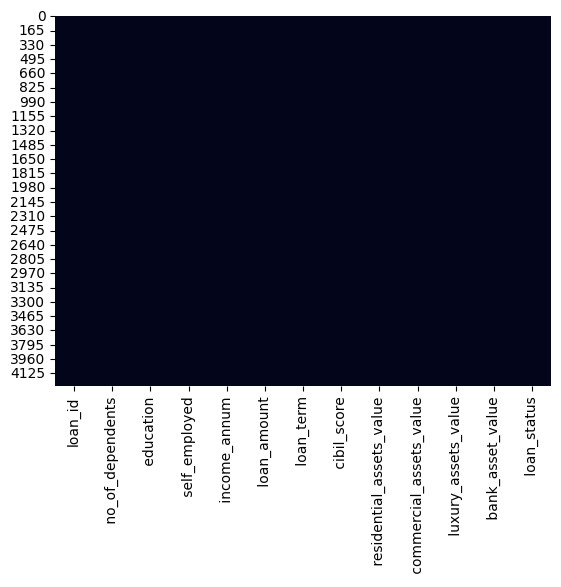

In [7]:
# Missing values analysis
sns.heatmap(df.isna(), cbar=False)

In [8]:
# Statitical analysis for numeric values excluding "loand_id" column
df.loc[:, df.columns != 'loan_id'].describe()

no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       4269.000000  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean           2.498712  5.059124e+06  1.513345e+07    10.900445   599.936051   
std            1.695910  2.806840e+06  9.043363e+06     5.709187   172.430401   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.700000e+06  7.700000e+06     6.000000   453.000000   
50%            3.000000  5.100000e+06  1.450000e+07    10.000000   600.000000   
75%            4.000000  7.500000e+06  2.150000e+07    16.000000   748.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.269000e+03             4.269000e+03         4.269000e+03   
mean               7.472617e+06             4.973155e+06         1.512631e+07   
std                6.503637e+06             4.388966e+06         9.103754e+06   
min               -1.000000e+05             0.000000e+00         3.000000e+05   
25%                2.200000e+06             1.300000e+06         7.500000e+06   
50%                5.600000e+06             3.700000e+06         1.460000e+07   
75%                1.130000e+07             7.600000e+06         2.170000e+07   
max                2.910000e+07             1.940000e+07         3.920000e+07   

       bank_asset_value  
count      4.269000e+03  
mean       4.976692e+06  
std        3.250185e+06  
min        0.000000e+00  
25%        2.300000e+06  
50%        4.600000e+06  
75%        7.100000e+06  
max        1.470000e+07

In [ ]:
# Value counts analysis

# Select numerical values only
numerical_features = df.select_dtypes(include=['number']).columns

# Browsing and exlude numerical columns
for col in df.columns:
    if col not in numerical_features:  # Exclut les colonnes numériques
        unique_values = df[col].unique()
        print(f"🔹 {col} ({len(unique_values)} valeurs uniques)")
        print(unique_values)  # Affiche toutes les valeurs uniques
        print("-" * 50)

🔹  education (2 valeurs uniques)
[' Graduate' ' Not Graduate']
--------------------------------------------------
🔹  self_employed (2 valeurs uniques)
[' No' ' Yes']
--------------------------------------------------
🔹  loan_status (2 valeurs uniques)
[' Approved' ' Rejected']
--------------------------------------------------


In [9]:
# Target value analysis
df[" loan_status"].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

## b) Distribution analysis

### i) Categorical analysis

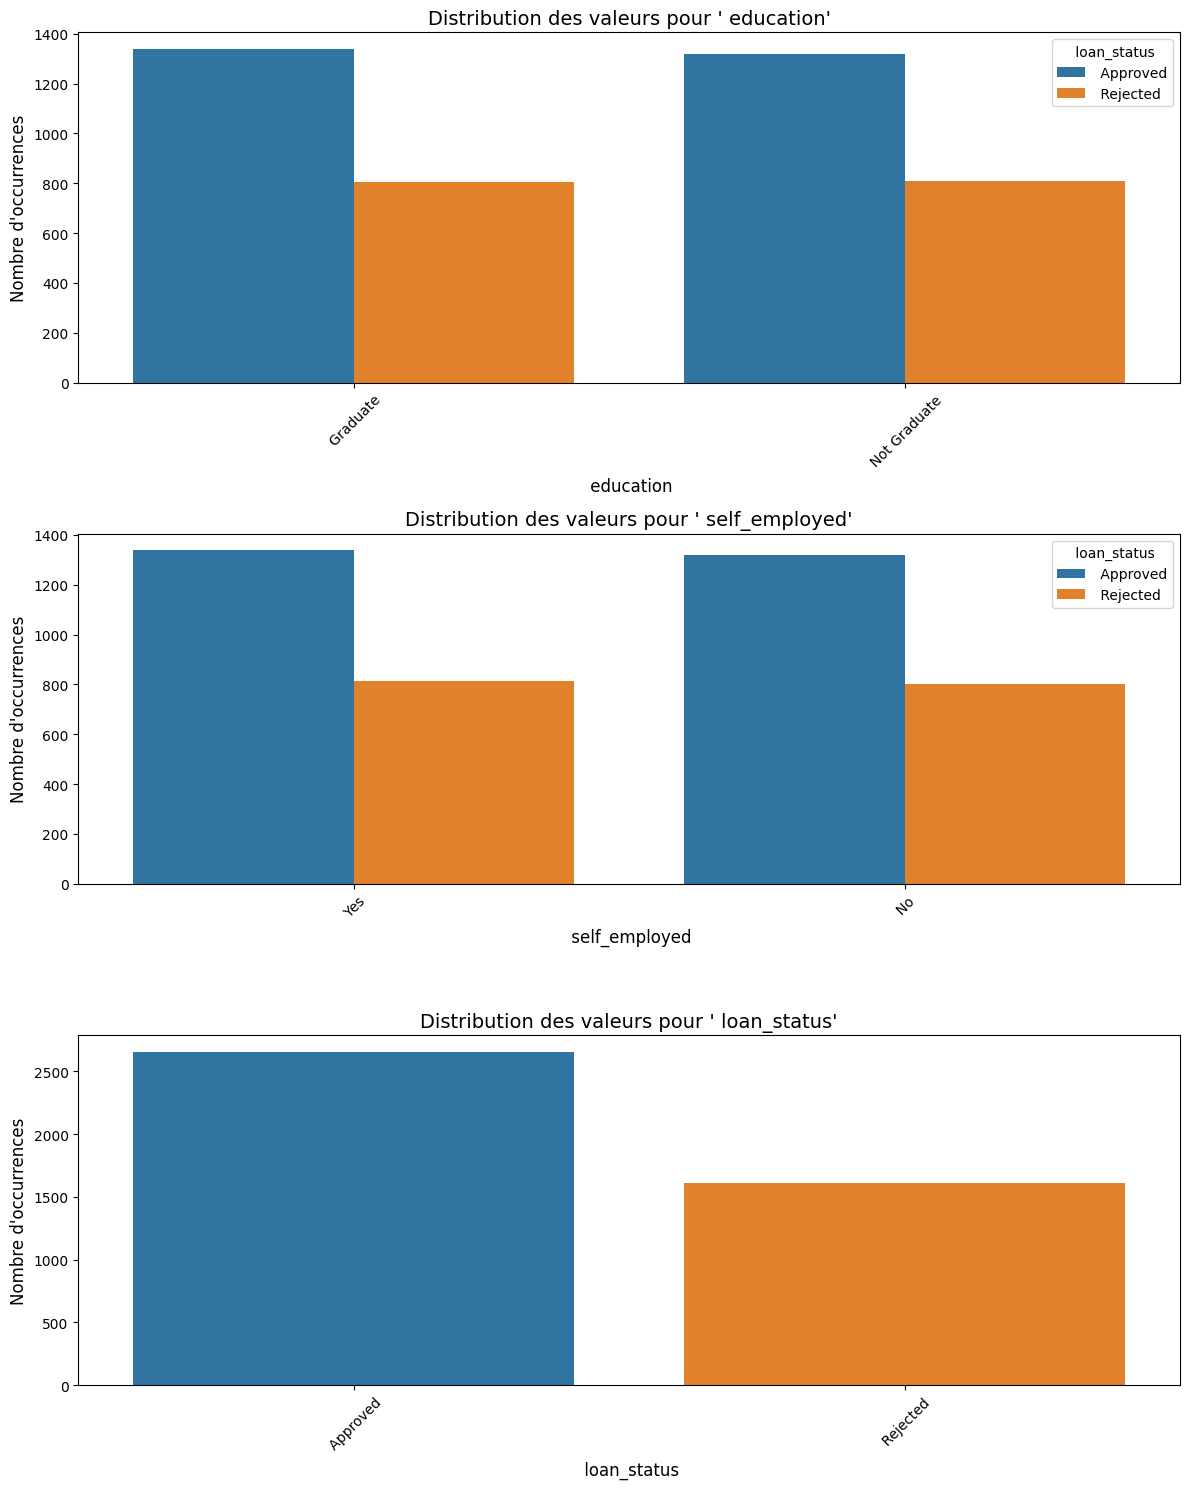

In [10]:
## distribution values for each categorical column


categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Définir la taille de la figure en fonction du nombre de colonnes catégoriques
num_cols = len(categorical_features)
fig, axes = plt.subplots(nrows=num_cols, figsize=(12, 5 * num_cols))

# Si une seule colonne catégorielle, on ajuste pour éviter une erreur d'affichage
if num_cols == 1:
    axes = [axes]

# Création des graphiques avec Seaborn
for ax, col in zip(axes, categorical_features):
    sns.countplot(data=df, x=col, hue=" loan_status", order=df[col].value_counts().index, ax=ax)
    ax.set_title(f"Distribution des valeurs pour '{col}'", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Nombre d'occurrences", fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotation des labels pour une meilleure lisibilité

# Ajuster l'espace entre les sous-graphiques
plt.tight_layout()
plt.show()

On peut également utiliser le code suivant pour avoir des valeurs par rapport aux analyses (Variable qualitative-Target) :

**sns.heatmap(pd.crosstab(df[target], df[var_quant]), annot=True, fmt='d')**

### ii) Numerical analysis

In [11]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

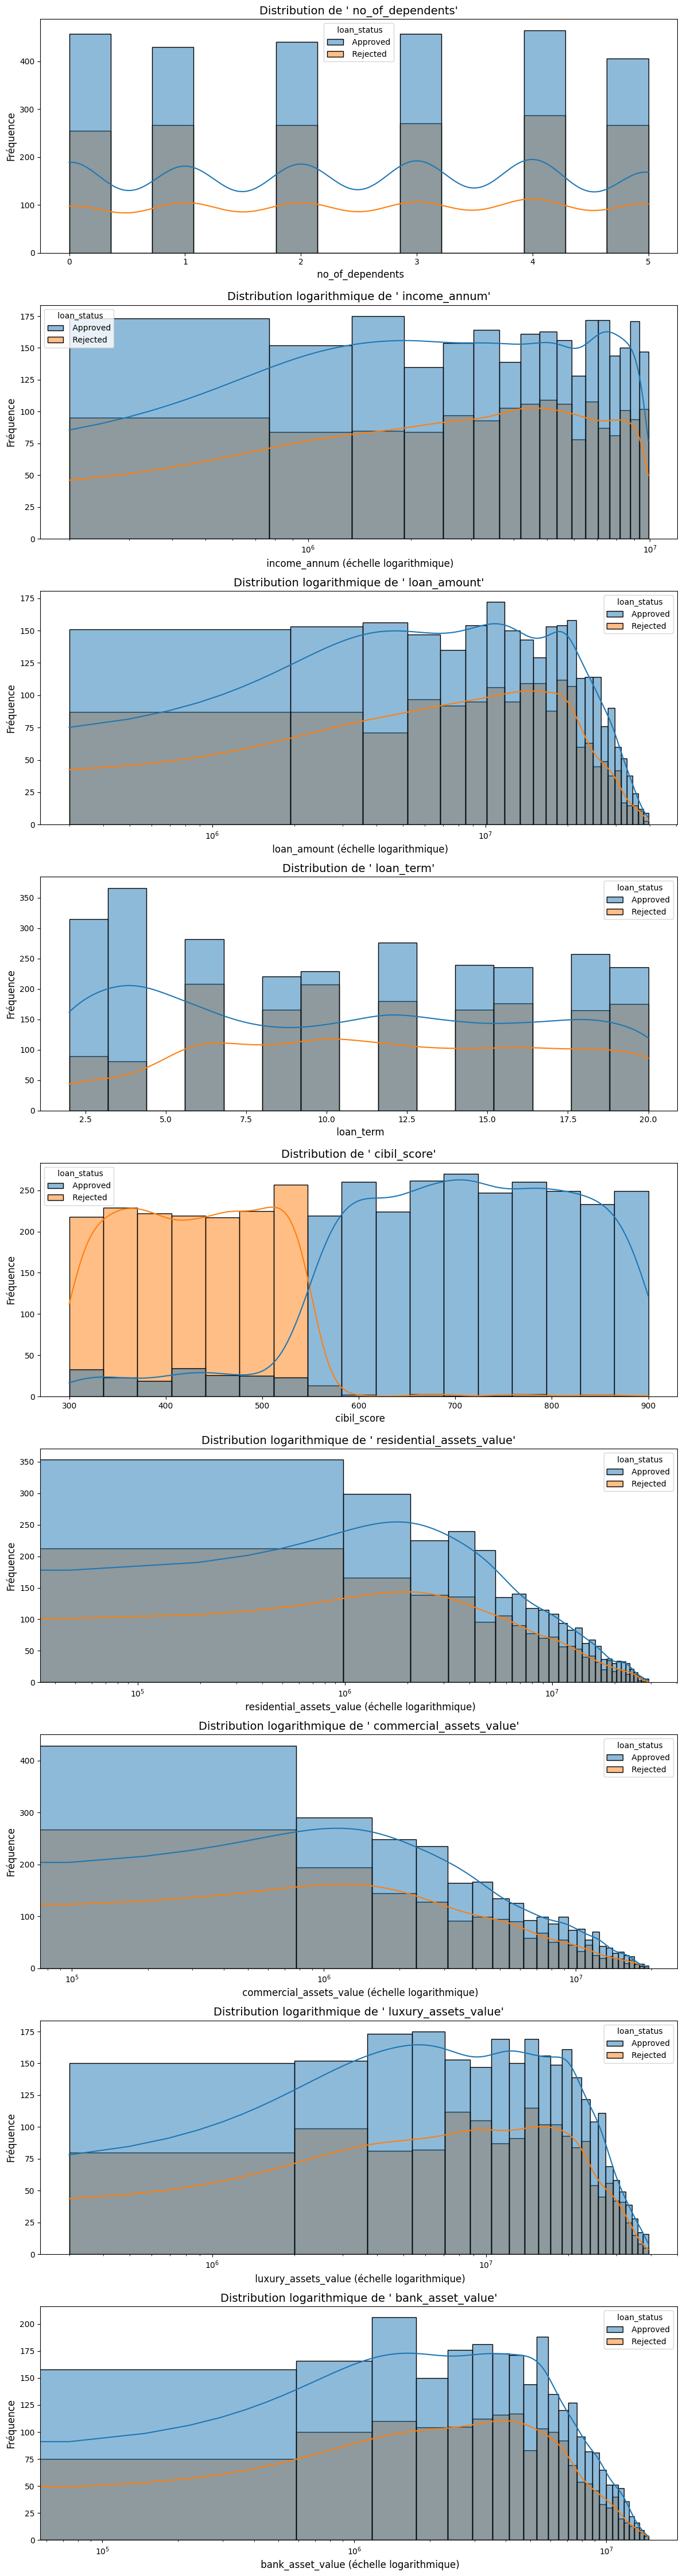

In [12]:
## Distribution values for each numerical column
numerical_features = df.loc[:, df.columns != 'loan_id'].select_dtypes(include=['number']).columns

# Définir la taille de la figure selon le nombre de colonnes numériques
num_cols = len(numerical_features)
fig, axes = plt.subplots(nrows=num_cols, figsize=(12, 5 * num_cols))

# Ajustement si une seule variable numérique
if num_cols == 1:
    axes = [axes]

# Création des histogrammes avec échelle log et palette 'viridis'
for i, (ax, col) in enumerate(zip(axes, numerical_features)):
    sns.histplot(data=df, x=col, kde="True", hue=" loan_status", ax=ax)

    # Appliquer une échelle logarithmique seulement pour les grandes valeurs
    if df[col].max() > 1000:
        ax.set_xscale('log')
        ax.set_xlabel(f"{col} (échelle logarithmique)", fontsize=12)
        ax.set_title(f"Distribution logarithmique de '{col}'", fontsize=14)
    else:
        ax.set_xlabel(col, fontsize=12)
        ax.set_title(f"Distribution de '{col}'", fontsize=14)

    ax.set_ylabel("Fréquence", fontsize=12)

plt.tight_layout()
plt.show()


The various analyses show that there is an imbalance of customers within the bank in terms of annual salaries and assets. Further analysis shows that loans are granted in a balanced way to customers who have status, qualifications or material assets.
However, loan approval is heavily influenced by the “credit score”: the lower your score, the more loans are refused, and the higher your score, the better(Also, there are some customers who are exceptions and have very low credit scores, but are still granted loans).

## c) Outlier analysis

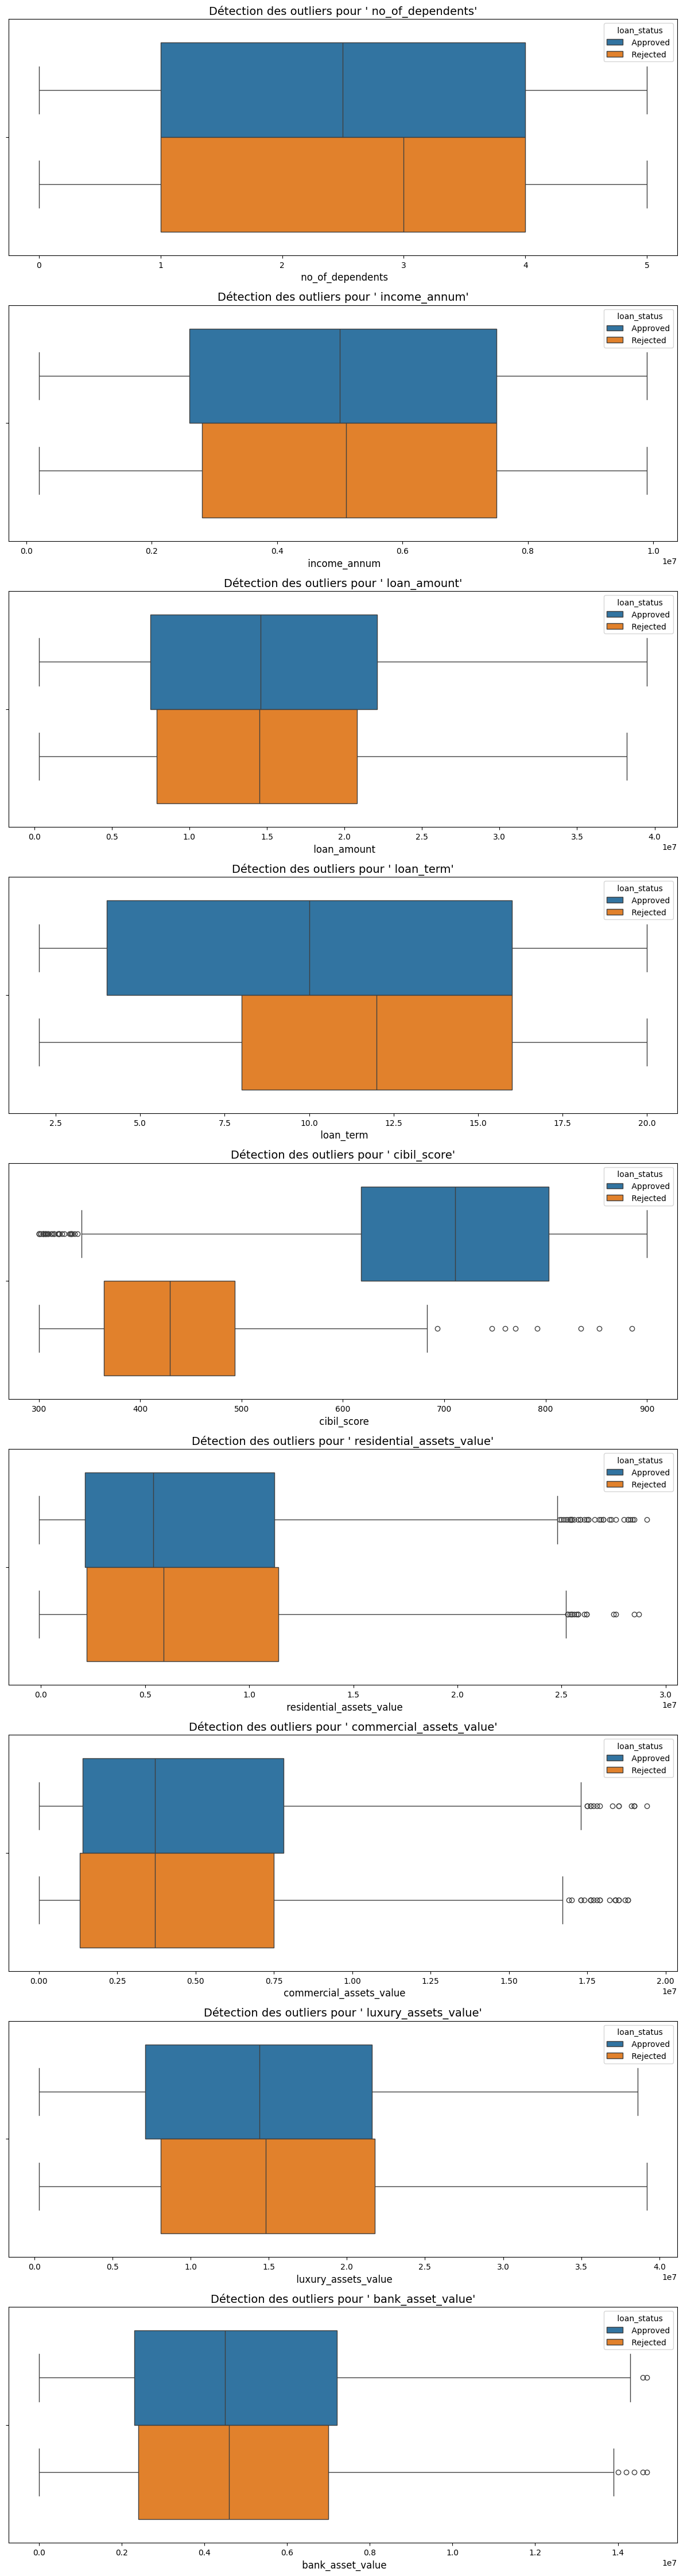

In [13]:
## Visualization of outliers for numerical_features

# Définir la taille de la figure en fonction du nombre de colonnes numériques
num_cols = len(numerical_features)
fig, axes = plt.subplots(nrows=num_cols, figsize=(12, 5 * num_cols))

# Si une seule colonne numérique, on ajuste pour éviter une erreur d'affichage
if num_cols == 1:
    axes = [axes]

# Création des boxplots avec Seaborn
for ax, col in zip(axes, numerical_features):
    sns.boxplot(data=df, x=col, hue=" loan_status", ax=ax)
    ax.set_title(f"Détection des outliers pour '{col}'", fontsize=14)
    ax.set_xlabel(col, fontsize=12)

# Ajuster l'espace entre les sous-graphiques
plt.tight_layout()
plt.show()

## d) Correlation analysis

### i) Spearman correlation

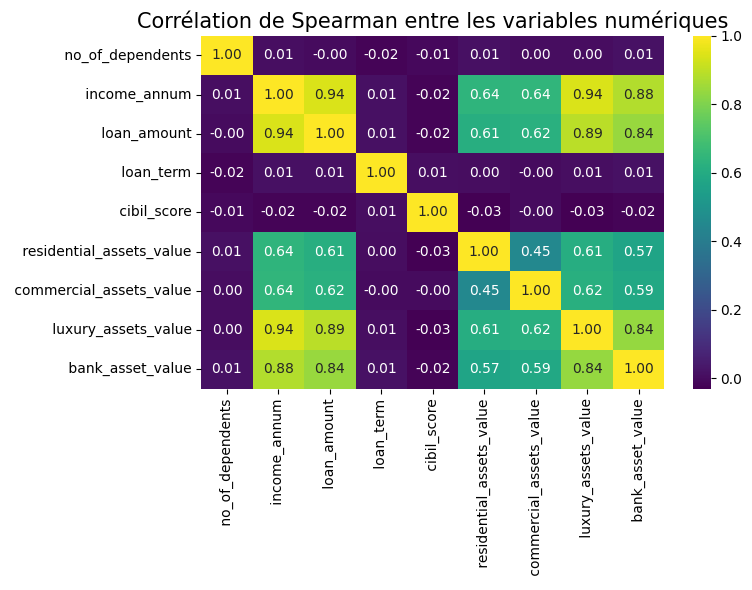

In [14]:
# Calcul de la corrélation de Spearman pour les variables numériques
spearman_corr = df[numerical_features].corr(method='spearman')

# Création de la heatmap
plt.figure(figsize=(8,6))
sns.heatmap(spearman_corr, annot=True, cmap='viridis', fmt=".2f")

plt.title("Corrélation de Spearman entre les variables numériques", fontsize=15)
plt.tight_layout()
plt.show()

### ii) Pairplot Visualization

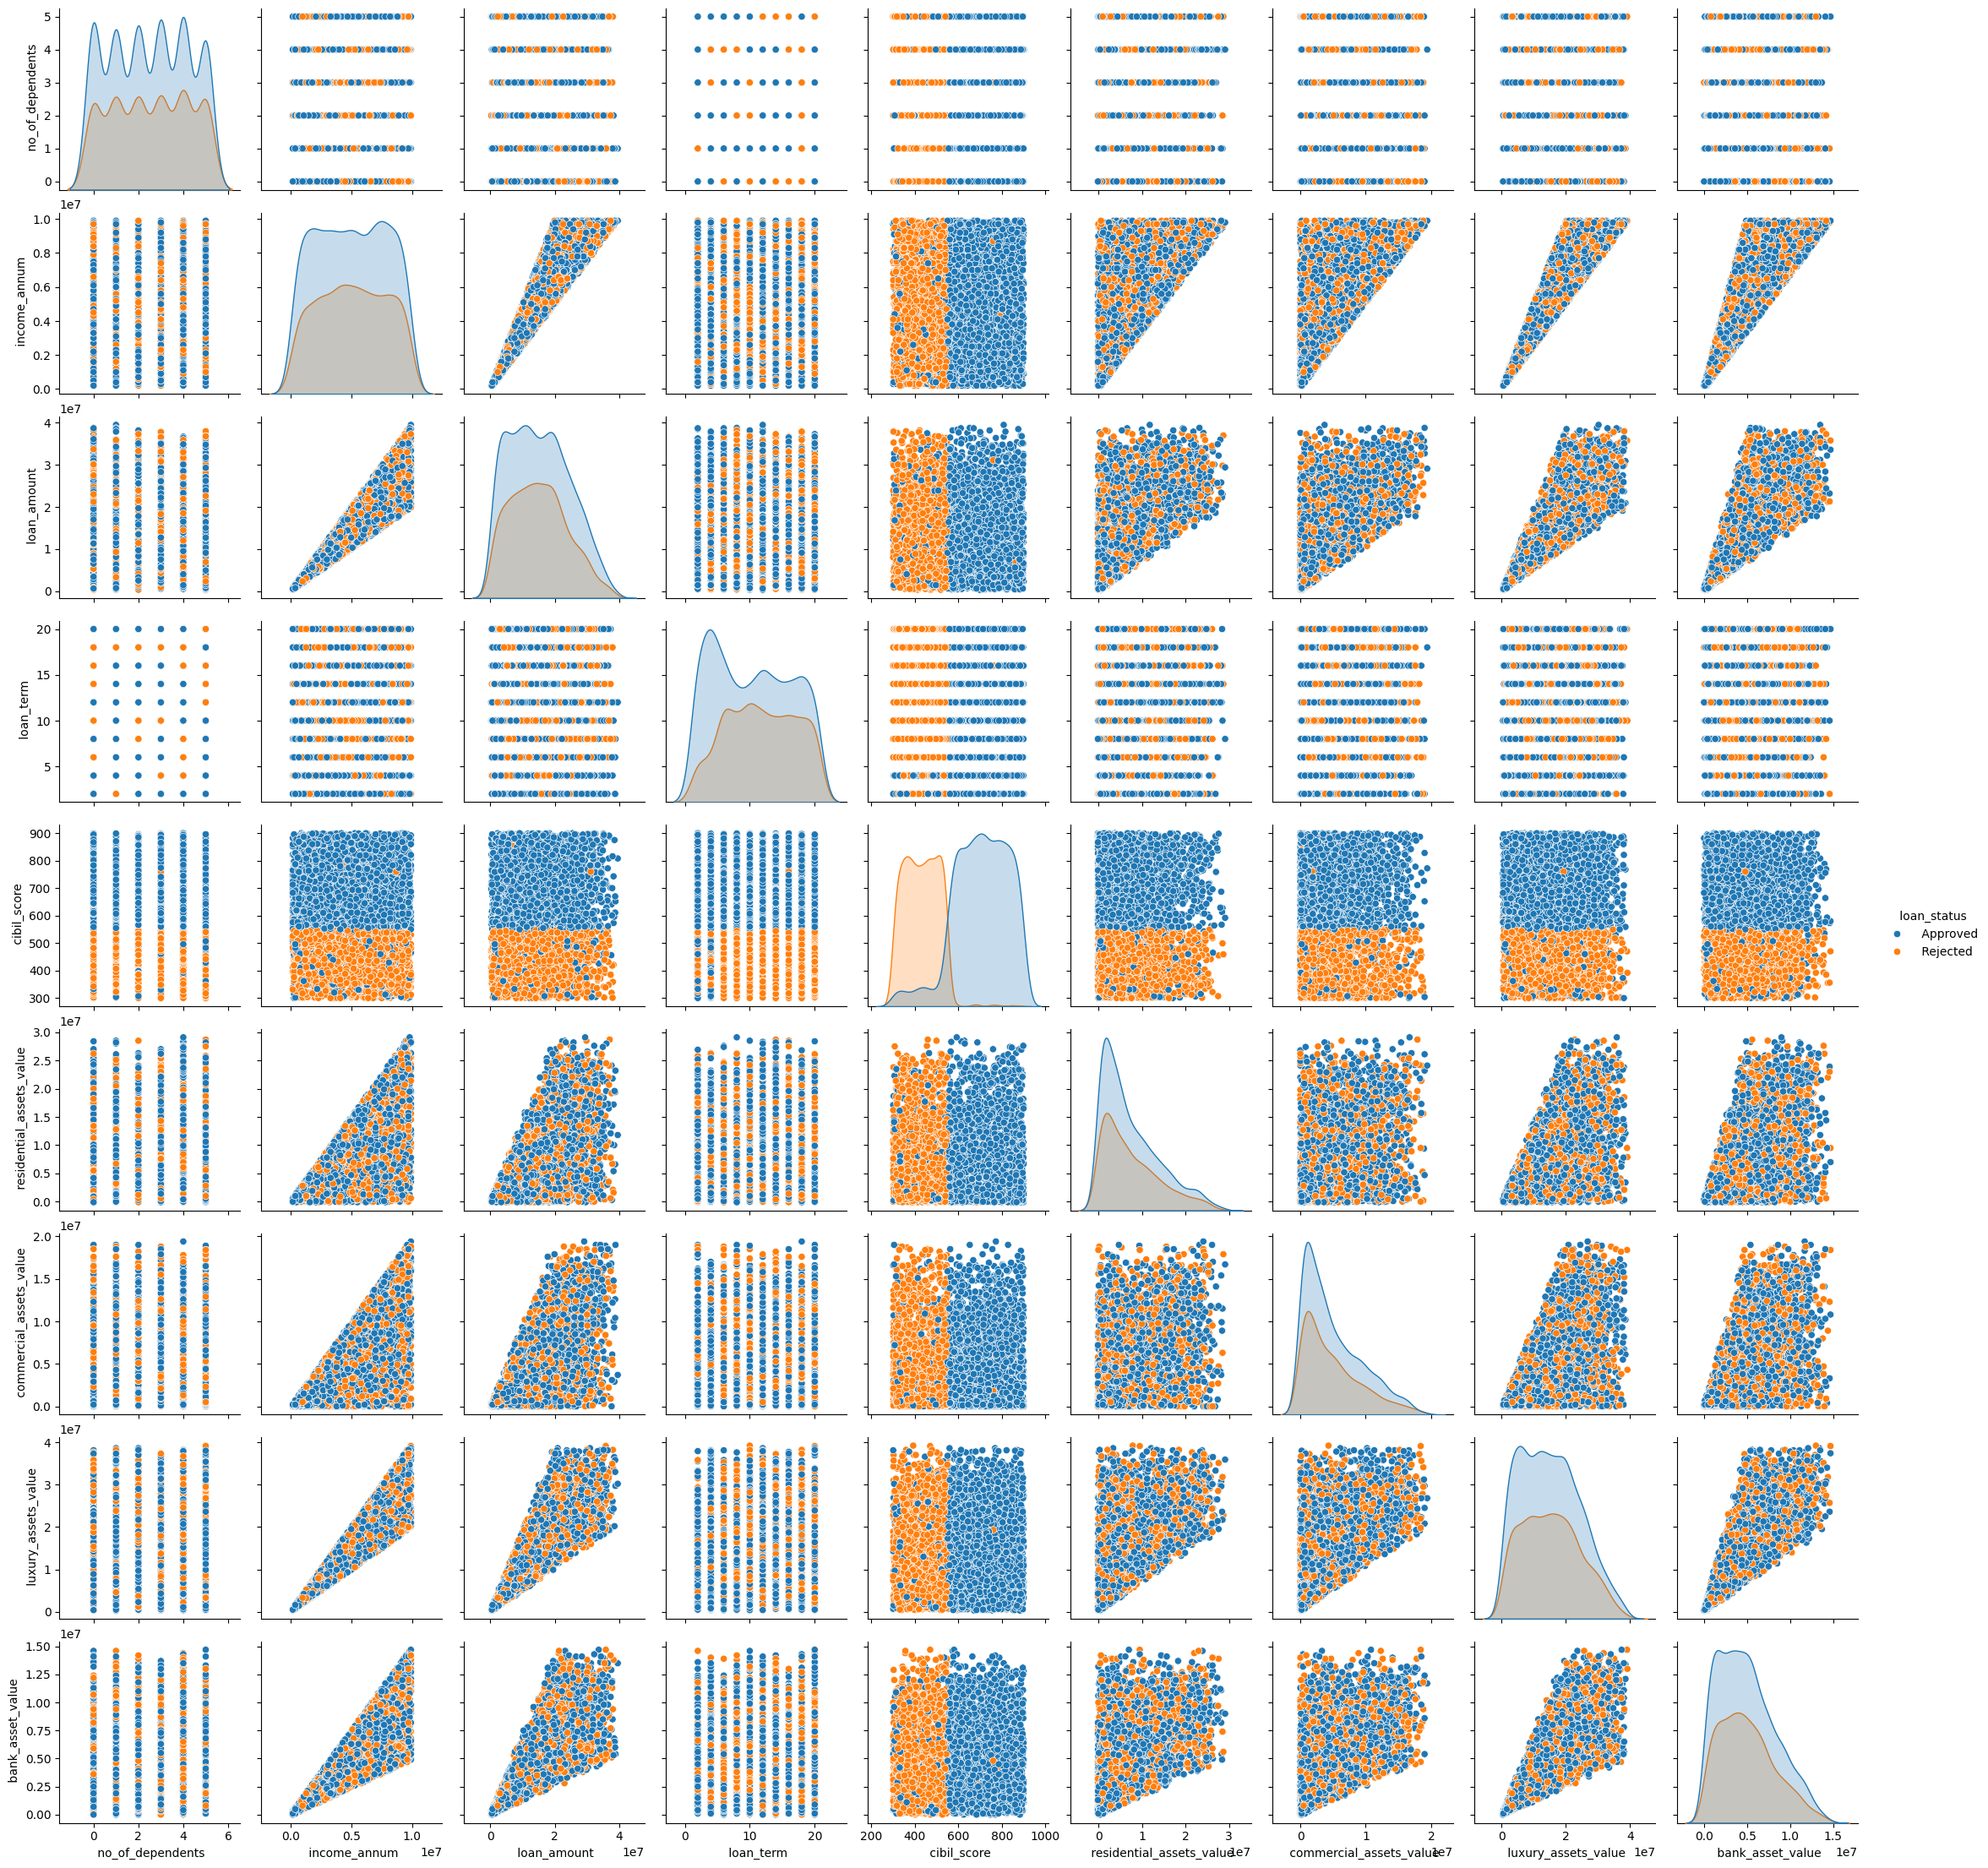

In [15]:
sns.pairplot(df.loc[:, df.columns != 'loan_id'], hue=' loan_status')
plt.show()

### iii) Cramer-V correlation

In [16]:
from scipy.stats import chi2_contingency

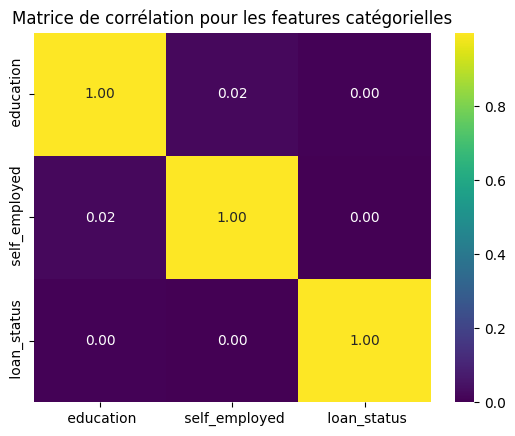

In [17]:
# Fonction pour calculer le coefficient de Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))


# Sélectionner uniquement les colonnes catégorielles
categorical_features = df.select_dtypes(include=['object'])

# Calculer la matrice de corrélation pour les features catégorielles
correlation_matrix = pd.DataFrame(
    index=categorical_features.columns,
    columns=categorical_features.columns
)

for col1 in categorical_features.columns:
    for col2 in categorical_features.columns:
        correlation_matrix.loc[col1, col2] = cramers_v(categorical_features[col1], categorical_features[col2])

# Convertir en float pour éviter les erreurs de type
correlation_matrix = correlation_matrix.astype(float)

# Afficher la heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title("Matrice de corrélation pour les features catégorielles")
plt.show()

# 3) Data Preprocessing

In this project, I will first pre-process the data in a simple and pragmatic way, evaluating my pre-processing with a simple and fast model, in this case the **“Decision Tree algorithm”**. Then, I'll do more preprocessing based on the results of my data with this basic model.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_copy_1 = df.copy()

In [20]:
trainset, testset = train_test_split(df_copy_1, test_size=0.2, random_state=0)

In [21]:
print(trainset.shape, testset.shape)

(3415, 13) (854, 13)


## a) Column preprocessing

In [22]:
# Delete loan_id column
def column_preprocessing(df):
  df = df.drop('loan_id', axis=1)
  return df


## b) Encoding categorical columns

In [23]:
# Encoding categorical values
def encoding(df):
  code = {
      ' Graduate': 1,
      ' Not Graduate': 0,
      ' Yes': 1,
      ' No': 0,
      ' Approved': 1,
      ' Rejected': 0
  }
  for col in df.select_dtypes('object').columns:
      df.loc[:,col] = df[col].map(code)
  return df

In [24]:
def preprocessing(df):

    df = column_preprocessing(df)
    df = encoding(df)

    X = df.drop(' loan_status', axis=1)
    y = df[' loan_status'].astype(int)

    print(X.shape, y.shape)

    return X, y

In [25]:
X_train, y_train = preprocessing(trainset)

(3415, 11) (3415,)


In [26]:
X_test, y_test = preprocessing(testset)

(854, 11) (854,)


## c) Basic modelisation

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif

In [29]:
decisision_tree_model = DecisionTreeClassifier(random_state=0)

## d) Basic evaluation

In [30]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [31]:
# Fitting and evaluation function
def evaluation(model):


    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting the learning curve to check for overfitting or underfitting
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1.0, 10))

    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='Training Score', marker='o')
    plt.plot(N, val_score.mean(axis=1), label='Validation Score', marker='o')
    plt.title('Learning Curve', fontsize=14)
    plt.xlabel('Training Set Size', fontsize=12)
    plt.ylabel('F1 Score', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot feature importances if the attribute exists
    if hasattr(model, 'feature_importances_'):
        pd.DataFrame(model.feature_importances_,
                     index=X_train.columns,
                     columns=['Importance']).sort_values(by='Importance').plot.barh(figsize=(12, 8))
        plt.title('Feature Importances', fontsize=14)
        plt.xlabel('Importance', fontsize=12)
        plt.ylabel('Features', fontsize=12)
        plt.grid(True)
        plt.show()
    else:
        print("This model does not have the attribute 'feature_importances_'.")


Confusion Matrix:
[[316  15]
 [ 12 511]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       331
           1       0.97      0.98      0.97       523

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



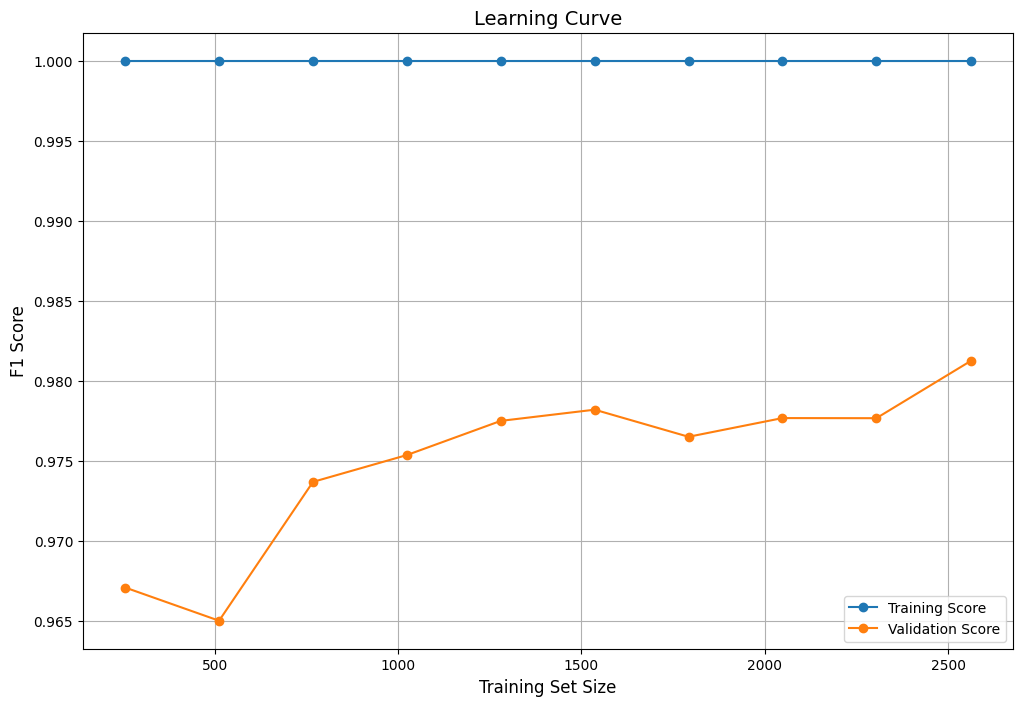

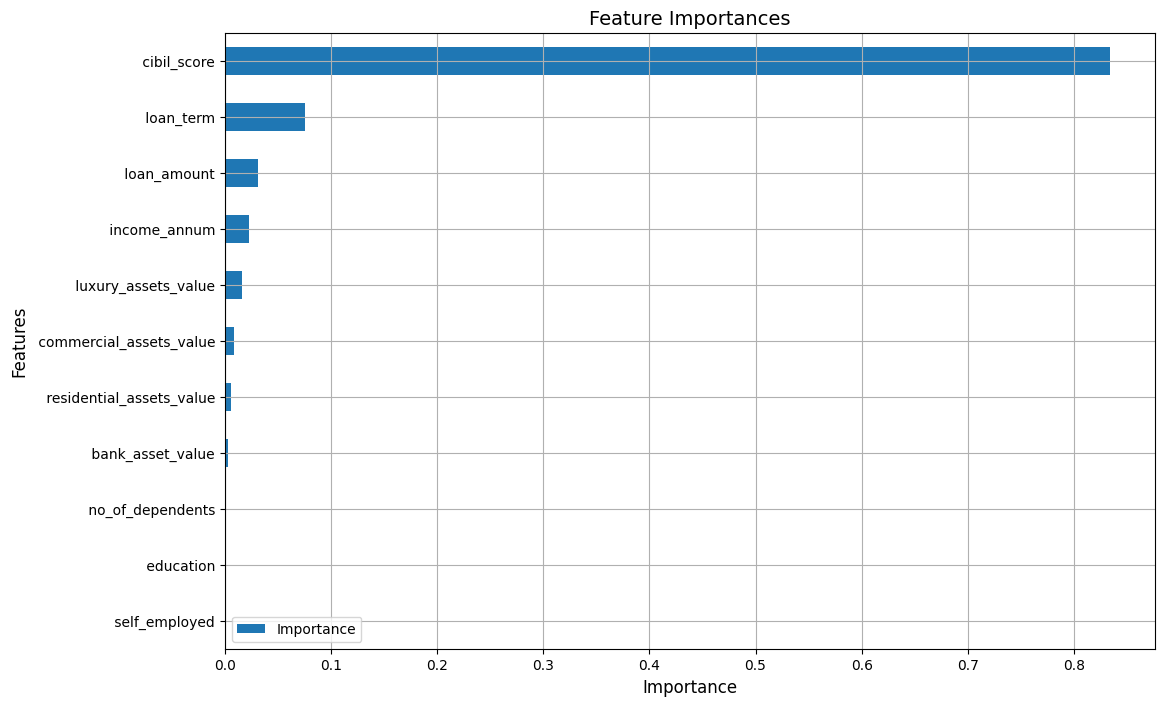

In [32]:
evaluation(decisision_tree_model)

Through this first test training, we can see that we're already getting good performance from our basic pre-processing. In the modeling stage, we'll train our data with other models, then try to optimize the parameters of the best-performing model in line with our specifications.

# 4 Modeling

## a) Making pipeline

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

**Pipeline model**


---


* **prepocessor** : for all models

preprocessor = make_pipeline(PolynomialFeatures(2,include_bias=False), SelectKBest(f_classif, k=8))

**PolynomialFeatures**: transformation that generates polynomial features of degree 2 from your input variables.


**SelectKBest(f_classif, k=8)** : selects the 8 most relevant variables according to the ANOVA F-test (f_classif), which measures the relationship between each feature and the target variable.


---

* **model_name** : which will contain the basic pipeline plus the model for models not requiring standardization, but will contain StandardScaler() for those requiring standardization.



In [34]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=8))

In [35]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [36]:
dict_of_models = {'--RandomForest--': RandomForest,
                  '--AdaBoost--' : AdaBoost,
                  '--SVM--': SVM,
                  '--KNN--': KNN
                 }

--RandomForest--
Confusion Matrix:
[[325   6]
 [ 18 505]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       331
           1       0.99      0.97      0.98       523

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



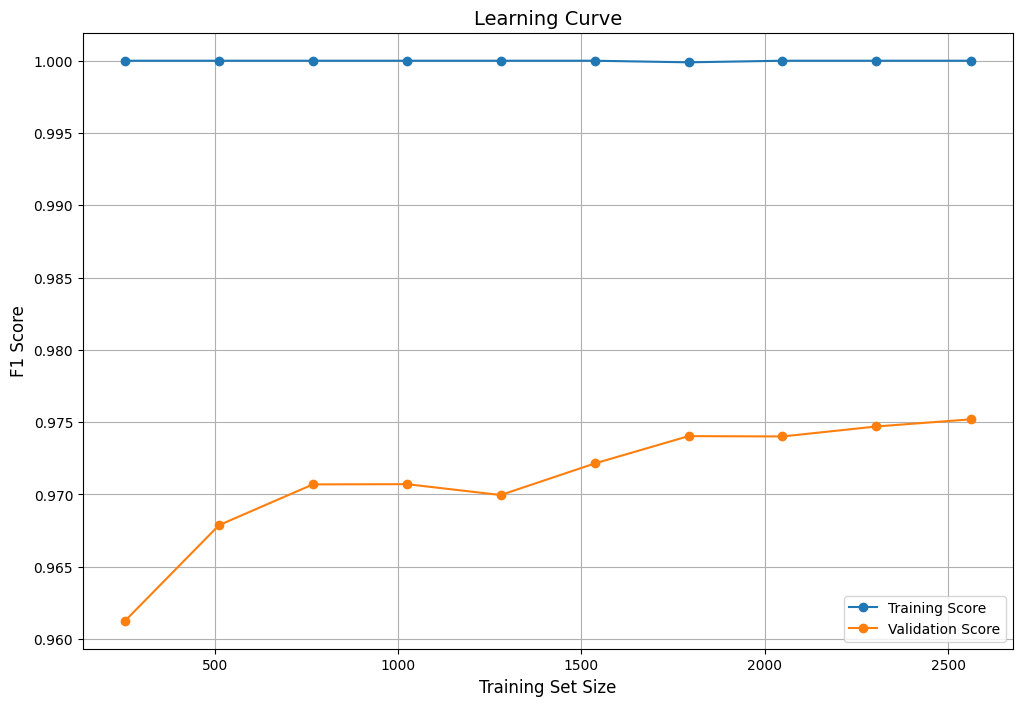

This model does not have the attribute 'feature_importances_'.
--AdaBoost--
Confusion Matrix:
[[322   9]
 [ 24 499]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       331
           1       0.98      0.95      0.97       523

    accuracy                           0.96       854
   macro avg       0.96      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854



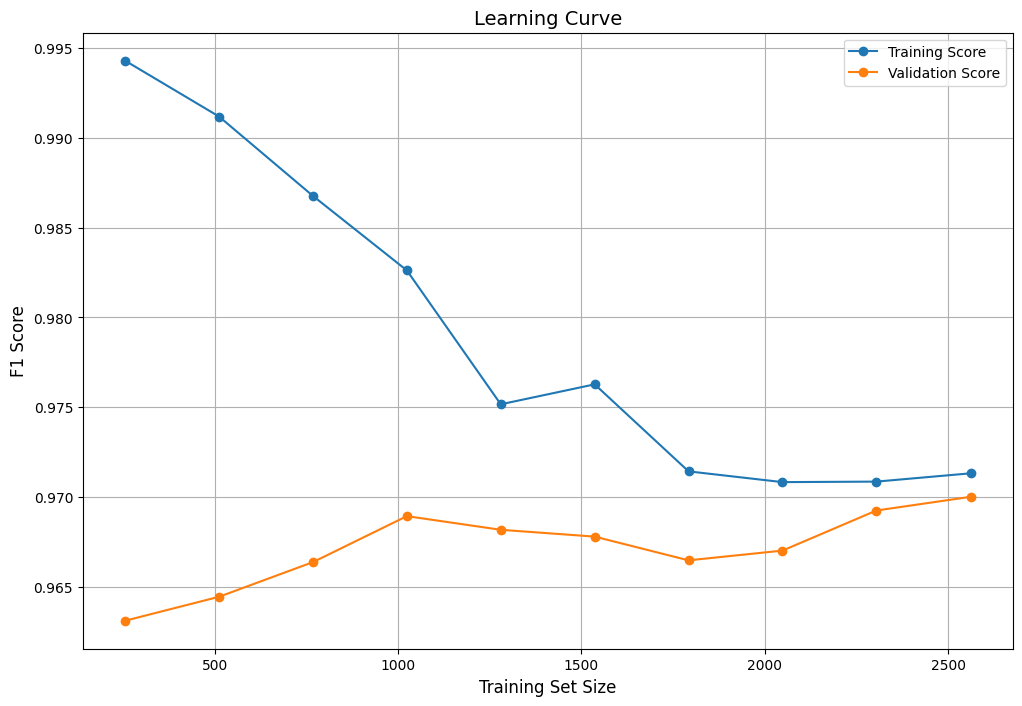

This model does not have the attribute 'feature_importances_'.
--SVM--
Confusion Matrix:
[[313  18]
 [ 27 496]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       331
           1       0.96      0.95      0.96       523

    accuracy                           0.95       854
   macro avg       0.94      0.95      0.94       854
weighted avg       0.95      0.95      0.95       854



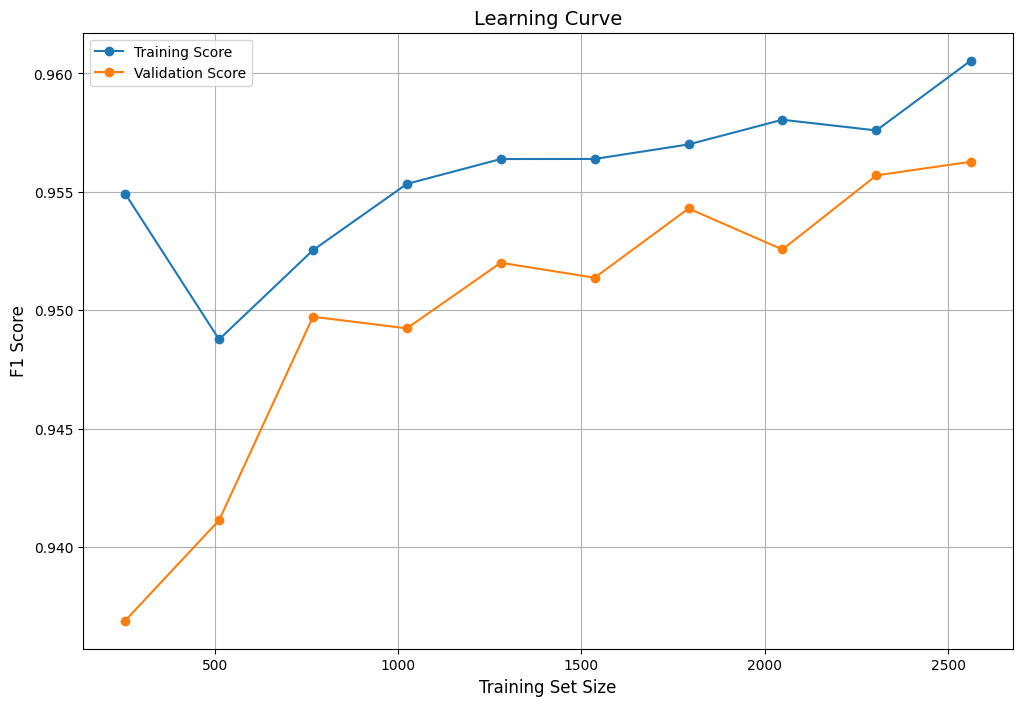

This model does not have the attribute 'feature_importances_'.
--KNN--
Confusion Matrix:
[[309  22]
 [ 29 494]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       331
           1       0.96      0.94      0.95       523

    accuracy                           0.94       854
   macro avg       0.94      0.94      0.94       854
weighted avg       0.94      0.94      0.94       854



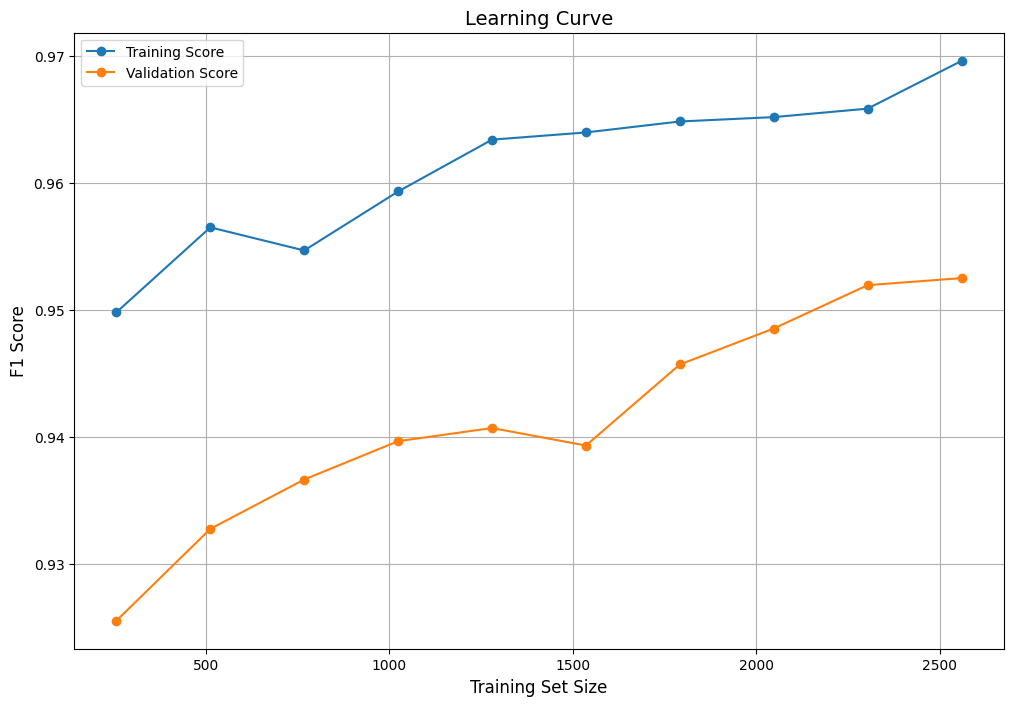

This model does not have the attribute 'feature_importances_'.


In [37]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

## b) Optimization of best model

We're going to try and optimize the performance of the SVM model, because by observing our learning curve, we can see that it's the model that manages to generalize best.

In [40]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [44]:
SVM.get_params()

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                   ('selectkbest', SelectKBest(k=8))])),
  ('standardscaler', StandardScaler()),
  ('svc', SVC(random_state=0))],
 'transform_input': None,
 'verbose': False,
 'pipeline': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('selectkbest', SelectKBest(k=8))]),
 'standardscaler': StandardScaler(),
 'svc': SVC(random_state=0),
 'pipeline__memory': None,
 'pipeline__steps': [('polynomialfeatures',
   PolynomialFeatures(include_bias=False)),
  ('selectkbest', SelectKBest(k=8))],
 'pipeline__transform_input': None,
 'pipeline__verbose': False,
 'pipeline__polynomialfeatures': PolynomialFeatures(include_bias=False),
 'pipeline__selectkbest': SelectKBest(k=8),
 'pipeline__polynomialfeatures__degree': 2,
 'pipeline__polynomialfeatures__include_bias': False,
 'pipeline__polynomialfeatures__interaction_only': Fals

In [45]:
hyper_params = {'svc__C':[1, 10, 100, 1000],
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(8,10)}

In [46]:
grid = GridSearchCV(SVM, hyper_params, scoring='f1', cv=4)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'pipeline__polynomialfeatures__degree': 3, 'pipeline__selectkbest__k': 8, 'svc__C': 100}
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       331
           1       0.98      0.99      0.99       523

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [48]:
grid.best_estimator_

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=False)),
                                 ('selectkbest', SelectKBest(k=8))])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(C=100, random_state=0))])

Confusion Matrix:
[[322   9]
 [  6 517]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       331
           1       0.98      0.99      0.99       523

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



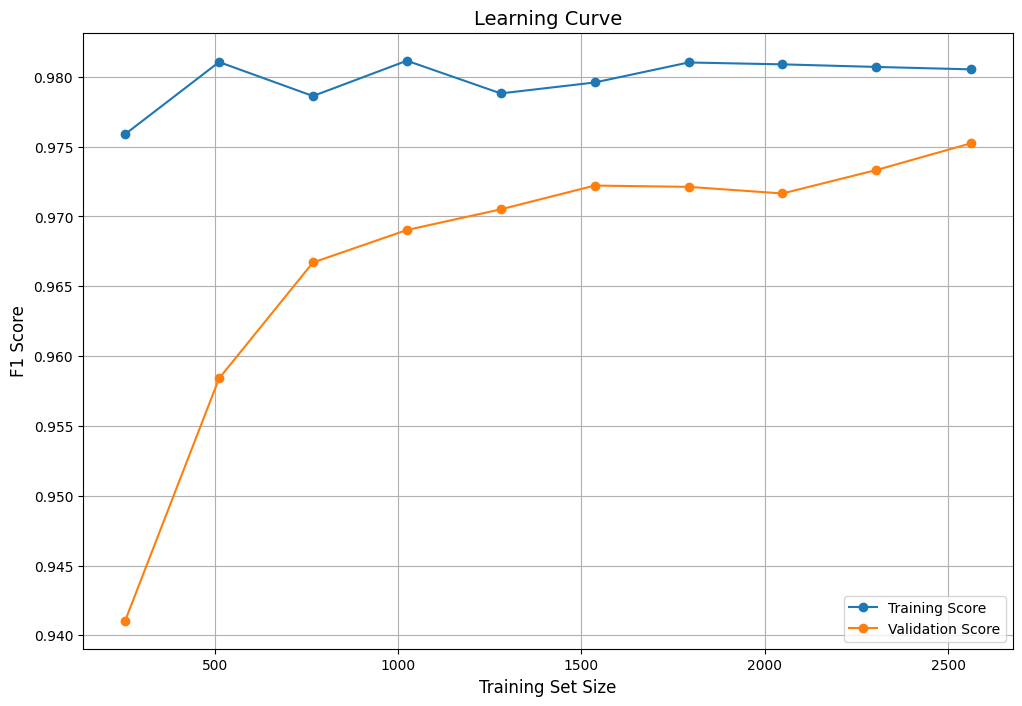

This model does not have the attribute 'feature_importances_'.


In [47]:
evaluation(grid.best_estimator_)

Great, we obtain a better version than before !!!